# PROJECT REGRESSION _PREDICTING MONTHLY ENERGY BILL

### Import Libraries

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Scaling
from sklearn.preprocessing import StandardScaler


### Read file 

In [3]:
file = r"E:\NIIT\Project\mini_project\1 regression\household_energy_bill\household_energy_bill.csv"
data = pd.read_csv(file)
data.head()

,rooms,people,area,is_ac,is_tv,is_flat,avg_mth_income,num_children,is_urban,amount_paid,month,day,thermsPerDay,kwh,notes
0,3,6,1057.52,1,1,0,16420.09,1,0,525.72,5,23,2.9,1062,NaN
1,0,3,649.56,1,1,0,24884.65,0,1,653.01,1,7,5.2,605,NaN
2,3,3,769.77,0,1,0,15884.25,2,0,536.82,9,23,3.2,943,NaN
3,0,1,557.07,1,1,1,7525.82,1,1,800.11,1,26,7.5,1133,NaN
4,1,6,725.53,0,1,0,25109.88,3,0,559.74,9,20,3.6,1128,NaN


In [5]:
# dimension 
data.shape


(1000, 15)

In [6]:
#data types 
data.dtypes


rooms               int64
people              int64
area              float64
is_ac               int64
is_tv               int64
is_flat             int64
avg_mth_income    float64
num_children        int64
is_urban            int64
amount_paid       float64
month               int64
day                 int64
thermsPerDay      float64
kwh                 int64
notes              object
dtype: object

In [7]:
# describe the dataset
data.describe()[1:]


,rooms,people,area,is_ac,is_tv,is_flat,avg_mth_income,num_children,is_urban,amount_paid,month,day,thermsPerDay,kwh
mean,1.962000,4.897000,794.703420,0.376000,0.798000,0.477000,24684.986550,1.078000,0.608000,600.396380,6.386000,16.585000,4.350700,656.666000
std,1.030348,2.007591,147.771736,0.484622,0.401693,0.499721,9678.228224,0.934232,0.488441,181.406178,3.448318,8.931772,2.581655,288.503547
min,-1.000000,-1.000000,244.400000,0.000000,0.000000,0.000000,-1576.440000,0.000000,0.000000,87.850000,1.000000,1.000000,0.000000,160.000000
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,18036.762500,0.000000,0.000000,475.067500,3.000000,9.000000,2.200000,406.750000
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,24742.575000,1.000000,1.000000,598.330000,6.000000,17.000000,4.300000,652.000000
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,31402.357500,2.000000,1.000000,729.932500,9.000000,25.000000,6.500000,905.000000
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,56531.080000,4.000000,1.000000,1102.990000,12.000000,31.000000,9.000000,1156.000000


In [8]:
# check for nulls
data.isnull().sum()

rooms               0
people              0
area                0
is_ac               0
is_tv               0
is_flat             0
avg_mth_income      0
num_children        0
is_urban            0
amount_paid         0
month               0
day                 0
thermsPerDay        0
kwh                 0
notes             985
dtype: int64

In [10]:
# check for 0
data[data==0].count()

rooms              65
people             13
area                0
is_ac             624
is_tv             202
is_flat           523
avg_mth_income      0
num_children      316
is_urban          392
amount_paid         0
month               0
day                 0
thermsPerDay       10
kwh                 0
notes               0
dtype: int64

In [11]:
data[data==-1].count()

rooms             5
people            4
area              0
is_ac             0
is_tv             0
is_flat           0
avg_mth_income    0
num_children      0
is_urban          0
amount_paid       0
month             0
day               0
thermsPerDay      0
kwh               0
notes             0
dtype: int64

### Data preparation

In [12]:
col_n =['rooms','people','area','avg_mth_income']
flt_data = data[~(data[col_n] <= 0).any(axis=1)]
flt_data[flt_data==0].count()
flt_data.shape

(907, 15)

## EDA 

In [14]:
# Singularity check 
flt_data.isnull().sum()
flt_data=flt_data.fillna('N/A')
for c in flt_data:
    x = flt_data[c].value_counts().head(4)/len(flt_data)
    print("\n")
    print(c,"\n",x)



rooms 
 2    0.403528
1    0.278942
3    0.253583
4    0.059537
Name: rooms, dtype: float64


people 
 5    0.224917
4    0.190739
6    0.179713
7    0.106946
Name: people, dtype: float64


area 
 761.19    0.002205
825.89    0.002205
631.54    0.002205
924.05    0.002205
Name: area, dtype: float64


is_ac 
 0    0.624035
1    0.375965
Name: is_ac, dtype: float64


is_tv 
 1    0.799338
0    0.200662
Name: is_tv, dtype: float64


is_flat 
 0    0.524807
1    0.475193
Name: is_flat, dtype: float64


avg_mth_income 
 16420.09    0.001103
22204.00    0.001103
11903.62    0.001103
21299.68    0.001103
Name: avg_mth_income, dtype: float64


num_children 
 1    0.371555
0    0.319735
2    0.238148
3    0.065050
Name: num_children, dtype: float64


is_urban 
 1    0.605292
0    0.394708
Name: is_urban, dtype: float64


amount_paid 
 522.84    0.002205
692.43    0.002205
525.72    0.001103
588.25    0.001103
Name: amount_paid, dtype: float64


month 
 10    0.099228
3     0.094818
4     0.09

In [15]:
# 'NOTES' column has singularity hence drop 
flt_data.drop(columns=["notes"],inplace= True)
flt_data.head()

,rooms,people,area,is_ac,is_tv,is_flat,avg_mth_income,num_children,is_urban,amount_paid,month,day,thermsPerDay,kwh
0,3,6,1057.52,1,1,0,16420.09,1,0,525.72,5,23,2.9,1062
2,3,3,769.77,0,1,0,15884.25,2,0,536.82,9,23,3.2,943
4,1,6,725.53,0,1,0,25109.88,3,0,559.74,9,20,3.6,1128
5,1,4,893.34,0,0,1,37558.92,1,0,434.31,9,2,1.5,1098
6,1,4,802.95,0,1,0,47110.28,1,0,410.31,10,25,1.2,844


In [16]:
# Extract the target variable 'y' from the dataset
# Separate 'y' variable from the dataset
flt_data.dtypes
y = flt_data['amount_paid']
X = flt_data.drop('amount_paid', axis=1)

In [17]:
# Standardize the remaining variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [18]:
# Combine standardized variables with 'y'
final_data = pd.DataFrame(X_std, columns=X.columns)
final_data['amount_paid'] = list(y)
final_data.isnull().sum()

rooms             0
people            0
area              0
is_ac             0
is_tv             0
is_flat           0
avg_mth_income    0
num_children      0
is_urban          0
month             0
day               0
thermsPerDay      0
kwh               0
amount_paid       0
dtype: int64

In [19]:
# DROP day and month 
final_data.drop(columns=["day","month"],inplace= True)
nc = final_data.select_dtypes(exclude=['object','category']).columns.values;nc

array(['rooms', 'people', 'area', 'is_ac', 'is_tv', 'is_flat',
       'avg_mth_income', 'num_children', 'is_urban', 'thermsPerDay',
       'kwh', 'amount_paid'], dtype=object)

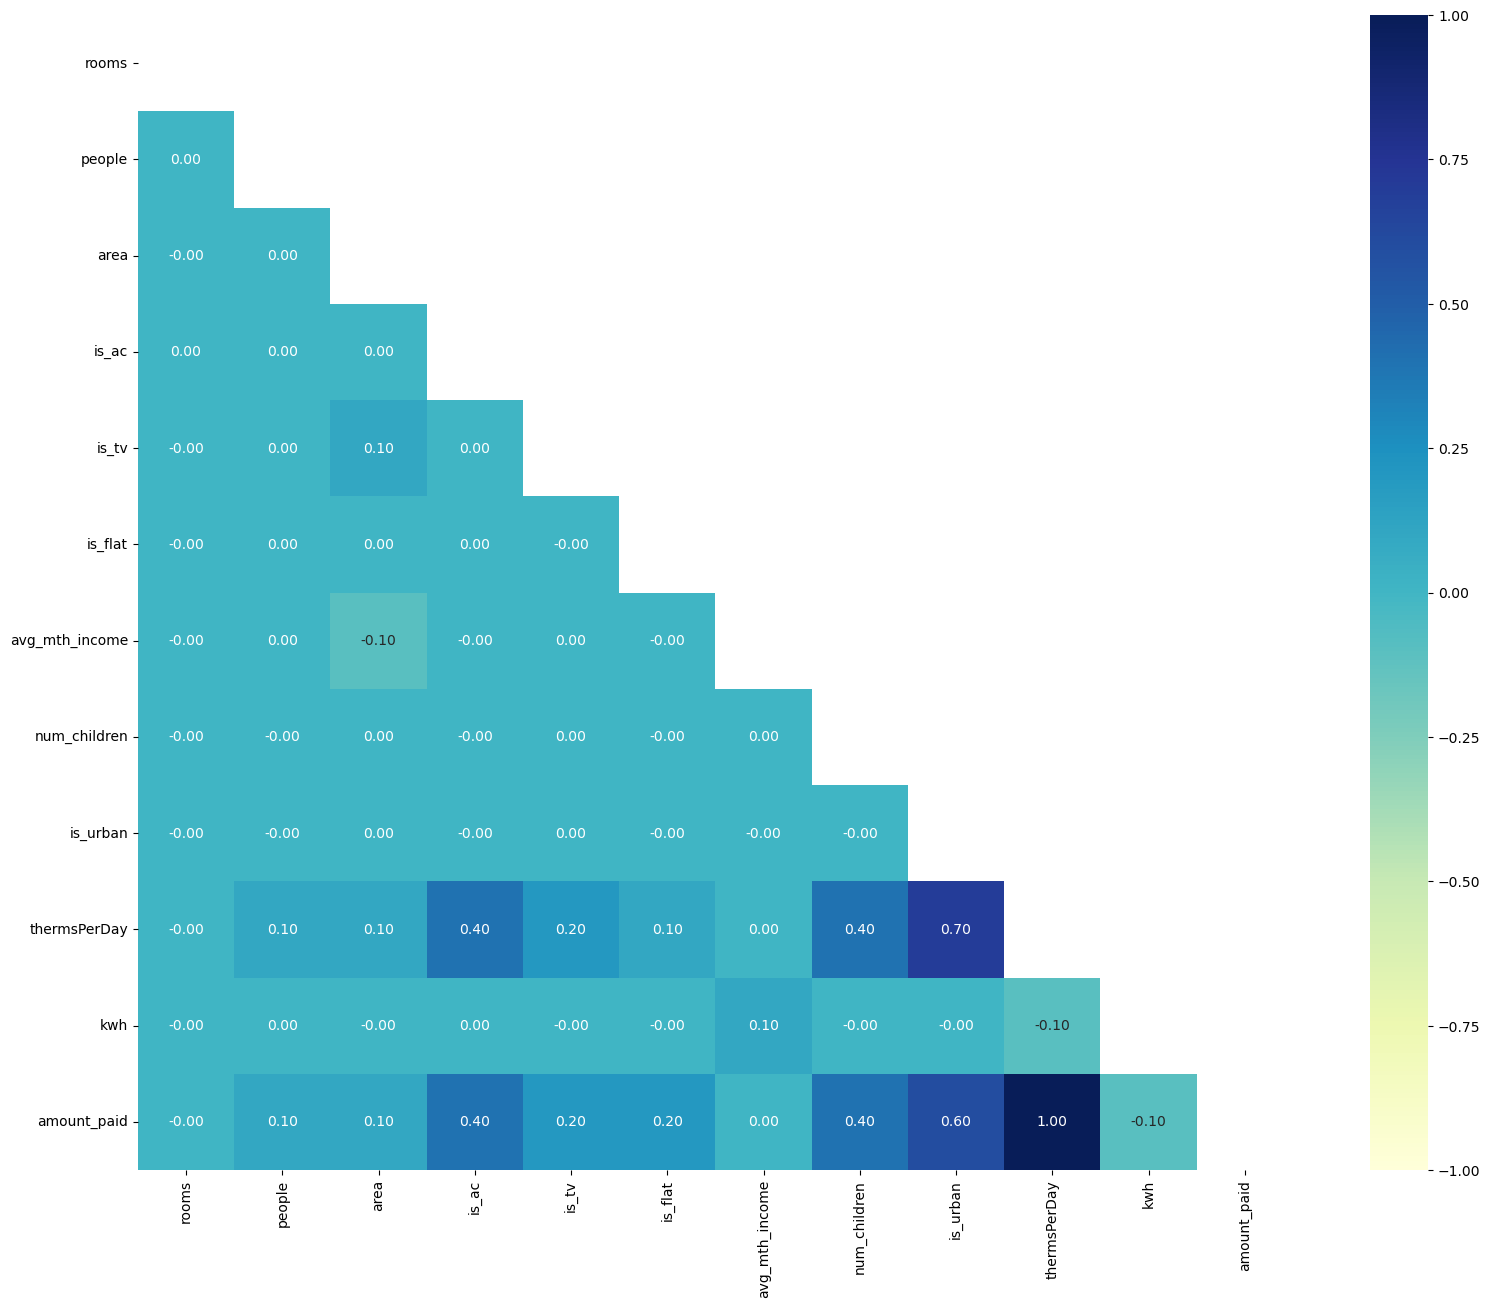

In [21]:
# Multicollinearity Check
def plotData(df,nc,ptype):
    
    if (ptype == "c"):
        plt.subplots(figsize=(20,15))
        cor = round(df[nc].corr(),1) # create the correlation matrix 
        mask = np.triu(np.ones_like(cor, dtype=bool))
        sns.heatmap(cor,cmap="YlGnBu",center=0, annot=True,vmin=-1,fmt='.2f',vmax=1,linecolor='w',square=True,mask=mask)
    
    if (ptype in ["b","h"]):
        R=5; C=2; P=1
        
        fig = plt.figure()
        for c in nc:
            fig.add_subplot(R,C,P)
            if (ptype=="b"):
                df.boxplot(column=c,vert=False)
            else:
                sns.distplot(df[c])
            P+=1
plotData(flt_data,nc,"c") # plot heatmap

In [23]:
#Split the data into train and test
y = "amount_paid"  
trainx,testx,trainy,testy = train_test_split(final_data.drop(y,1),
                                             final_data[y],
                                             test_size =0.2,random_state=(42))
print("trainx={},trainy={},testx={},testy={}".format(trainx.shape, trainy.shape,testx.shape,testy.shape))

trainx=(725, 11),trainy=(725,),testx=(182, 11),testy=(182,)


C:\Users\Rishabh\AppData\Local\Temp\ipykernel_16404\1137975251.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainx,testx,trainy,testy = train_test_split(final_data.drop(y,1),


## ----------- LINEAR REGRESSION MODEL

In [24]:
from sklearn.linear_model import LinearRegression

# Create linear regression model
model1 = LinearRegression()
model1.fit(trainx, trainy)

LinearRegression()

In [26]:
# Predict 'amount_paid' for the test data
pred_LR = model1.predict(testx)
# evaluate the LR model and check actual vs predicted mpg
res_LR = pd.DataFrame({'actual_amount_paid_LR':testy,'pred_amount_paid_LR':pred_LR})
print(res_LR.head(10)) 

     actual_amount_paid_LR  pred_amount_paid_LR
868                 836.69           858.981847
439                 576.22           561.935595
342                 783.05           776.843056
735                 756.65           745.426606
784                 637.12           658.873438
836                 716.90           714.533407
522                 682.41           703.656033
265                 605.25           612.195285
902                 495.18           471.389322
539                 746.10           762.942509


In [27]:
# MLR errors
sse = round(sum(np.power(np.array(res_LR.actual_amount_paid_LR.values) - np.array(res_LR.pred_amount_paid_LR.values), 2)), 3) # sum of squared error
mse = round(sse / len(res_LR),3) # mean squared error
rmse = round(np.sqrt(mse),3) # root mean squared error
print("Model=LR:Model_lR. sse={},mse={},rmse={}".format(sse,mse,rmse))

Model=LR:Model_lR. sse=154176.603,mse=847.124,rmse=29.105


In [28]:

#--------------Random forest model 
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
m_rf = rfr()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
params = {'n_estimators':np.arange(5,31,5),
          'max_depth': np.arange(2,11),
          'max_features': np.arange(2,6)}

grid_search = GridSearchCV(estimator=m_rf, param_grid=params, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
grid_search.fit(trainx, trainy)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': array([2, 3, 4, 5]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30])},
             scoring='neg_mean_squared_error')

In [29]:
# Get the best model with the optimized hyperparameters
best_model = grid_search.best_estimator_
pred_RF = best_model.predict(testx)
# evaluate the LR model and check actual vs predicted mpg
res_RF = pd.DataFrame({'actual_amount_paid_RF':testy,'pred_amount_paid_RF':pred_RF})
print(res_RF.head(10)) 

     actual_amount_paid_RF  pred_amount_paid_RF
868                 836.69           825.102448
439                 576.22           575.798783
342                 783.05           771.776001
735                 756.65           746.311049
784                 637.12           639.466733
836                 716.90           711.658645
522                 682.41           706.413661
265                 605.25           587.187698
902                 495.18           495.752334
539                 746.10           729.809250


In [30]:
# MLR errors
sse1 = round(sum(np.power(np.array(res_RF.actual_amount_paid_RF.values) - np.array(res_RF.pred_amount_paid_RF.values), 2)), 3) # sum of squared error
mse1 = round(sse1 / len(res_RF),3) # mean squared error
rmse1 = round(np.sqrt(mse1),3) # root mean squared error
print("Model=RF:Model_RF. sse1={},mse1={},rmse1={}".format(sse1,mse1,rmse1))

Model=RF:Model_RF. sse1=40079.74,mse1=220.218,rmse1=14.84


## ------------ Model Ensemble 
## ------------ Abr & RF as base model where as LR as meta model

In [31]:

from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.ensemble import StackingRegressor

def StackModels():
    
    # define the base models
    lst_basemodels = []
    lst_basemodels.append(('ABR',abr(n_estimators=50))) # adaboost
    lst_basemodels.append(('RF',rfr(n_estimators=50))) # random forest
    
    # Meta model
    metamodel = LinearRegression()
    
    # Stacking Classifier model
    stackmodel = StackingRegressor(estimators=lst_basemodels,final_estimator=metamodel,
                               cv=3)
    
    return (lst_basemodels,metamodel,stackmodel)

In [32]:
# Run the function 
m_base, m_meta, m_stack = StackModels()

# Build the stack model to predict 
modelStack = m_stack.fit(trainx, trainy)
# Predict on test data
predStack = modelStack.predict(testx)

In [33]:
# evaluate the MLR model and check actual vs predicted mpg
report_stack = pd.DataFrame({'actual_amount_paid_ST':testy,'pred_amount_paid_ST':predStack})
print(report_stack.head(10))

# MLR errors
sse2 = round(sum(np.power(np.array(report_stack.actual_amount_paid_ST.values) - np.array(report_stack.pred_amount_paid_ST.values),2)),3) # sum of squared error
mse2 = round(sse2 / len(report_stack),3) # mean squared error
rmse2 = round(np.sqrt(mse2),3) # root mean squared error
print("Model=Stack:m_stack. sse={},mse={},rmse={}".format(sse2,mse2,rmse2))

     actual_amount_paid_ST  pred_amount_paid_ST
868                 836.69           833.906940
439                 576.22           574.300031
342                 783.05           782.659981
735                 756.65           761.951590
784                 637.12           637.267673
836                 716.90           717.604756
522                 682.41           680.525224
265                 605.25           603.179250
902                 495.18           501.254980
539                 746.10           748.663586
Model=Stack:m_stack. sse=14860.049,mse=81.649,rmse=9.036


In [34]:

# ------------ Comparing Models
from tabulate import tabulate

# assign data
sse_v=[sse,sse1,sse2]
mse_v=[mse,mse1,mse2]
rmse_v=[rmse,rmse1,rmse2]
Model=["M1_LR","M2_RF","M3_STACKING"]
HDR=["MODEL","SSE","MSE","RMSE"]
D1=list(zip(Model,sse_v,mse_v,rmse_v))
print(tabulate(D1,headers=HDR,tablefmt="grid"))

+-------------+----------+---------+--------+
| MODEL       |      SSE |     MSE |   RMSE |
+=============+==========+=========+========+
| M1_LR       | 154177   | 847.124 | 29.105 |
+-------------+----------+---------+--------+
| M2_RF       |  40079.7 | 220.218 | 14.84  |
+-------------+----------+---------+--------+
| M3_STACKING |  14860   |  81.649 |  9.036 |
+-------------+----------+---------+--------+


### From above analysis, LInear Regression is the best model performed on data, hence prediction can be taken from linear regression.
## plot the best fit line 

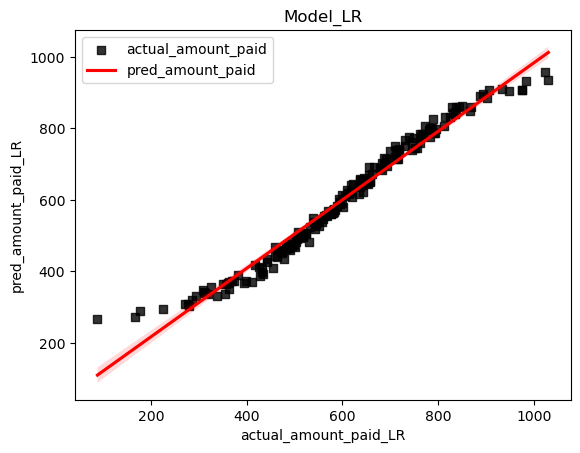

In [35]:
sns.regplot(x='actual_amount_paid_LR',y='pred_amount_paid_LR',data=res_LR,marker=',',color='black',label='actual_amount_paid',
            line_kws={'color':'red','label':'pred_amount_paid'})
plt.title("Model_LR")
plt.legend()